# Dataset
This dataset is called 'Adult Income Dataset' or 'Census Income Dataset'. Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).
Prediction task is to determine whether a person makes over 50K a year.

## Overall Picture of the Data
- **Age**: The age of individuals. Varies from 17 to 90.

- **Workclass**: The type of job of the adult. Its value can be one of _Private_, _Self-emp-not-inc_, _Self-emp-inc_, _Federal-gov_, _Local-gov_, _State-gov_, _Without-pay_, _Never-worked_.

- **fnlwgt**: See next section.

- **education**: The highest level of education the adult has achieved. Its value can be one of _Bachelors_, _Some-college_, _11th_, _HS-grad_, _Prof-school_, _Assoc-acdm_, _Assoc-voc_, _9th_, _7th-8th_, _12th_, _Masters_, _1st-4th_, _10th_, _Doctorate_, _5th-6th_, _Preschool_.

- **education-num**: The number of years spent in education. Varies from 1 to 16.

- **marital-status**: Values include _Married-civ-spouse_, _Divorced_, _Never-married_, _Separated_, _Widowed_, _Married-spouse-absent_, _Married-AF-spouse_.

- **occupation**: Values include _Tech-support_, _Craft-repair_, _Other-service_, _Sales_, _Exec-managerial_, _Prof-specialty_, _Handlers-cleaners_, _Machine-op-inspct_, _Adm-clerical_, _Farming-fishing_, _Transport-moving_, _Priv-house-serv_, _Protective-serv_, _Armed-Forces_.

- **relationship**: Values include _Wife_, _Own-child_, _Husband_, _Not-in-family_, _Other-relative_, _Unmarried_.

- **race**: Values include _White_, _Asian-Pac-Islander_, _Amer-Indian-Eskimo_, _Other_, _Black_.

- **sex**: Values include _Female_, _Male_.

- **capital-gain**: Varies from 0 to 99,999.

- **capital-loss**: Varies from 0 to 4356.

- **hours-per-week**: Varies from 1 to 99.

- **native-country**: Values include _United-States_, _Cambodia_, _England_, _Puerto-Rico_, _Canada_, _Germany_, _Outlying-US(Guam-USVI-etc)_, _India_, _Japan_, _Greece_, _South_, _China_, _Cuba_, _Iran_, _Honduras_, _Philippines_, _Italy_, _Poland_, _Jamaica_, _Vietnam_, _Mexico_, _Portugal_, _Ireland_, _France_, _Dominican-Republic_, _Laos_, _Ecuador_, _Taiwan_, _Haiti_, _Columbia_, _Hungary_, _Guatemala_, _Nicaragua_, _Scotland_, _Thailand_, _Yugoslavia_, _El-Salvador_, _Trinadad&Tobago_, _Peru_, _Hong_, _Holand-Netherlands_.

- **income**: TARGET VARIABLE. Value can be either '>50K' or '<=50K'.

### Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.  
These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Loading the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Observations
1. The null values in the data are '?', and hence not considered as null values in the output of df.info()
1. The 'fnlwgt' attribute is similar for individuals with similar data, but is not related any single individual, hence it should not be considered.
1. The two features 'education' and 'education.num' give the same information, hence only one of them is required. 
1. Only the _workclass_, _occupation_, and _native.country_ have missing values. Since all of them are categorical features, it would be a great idea to impute them using the `mode` of the respective features.
1. The lowest value for capital gain is 0, while the highest value is 99999, which is odd.

In [6]:
df.drop(columns=['fnlwgt', 'education'], inplace=True, axis=1)

In [7]:
df.replace("?", pd.NA, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

### Accounting for oddness in 'capital gain'

In [9]:
sorted(df["capital.gain"].unique().tolist())[-10:]

[15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095, 41310, 99999]

We observe that no other value in close to 99999 in capital gain. Also, it is a common practice to use '9's for NaN values for numerical data. Hence, the '99999's must be treated as NaN values. For this project, I will be setting all these '99999's to '0'.

In [10]:
df["capital.gain"].replace(99999, 0, inplace=True)

## Checking for any duplicate data samples

In [11]:
number_of_samples_before = df.shape[0]
df.drop_duplicates(inplace=True)
number_of_samples_after = df.shape[0]

print(number_of_samples_before)
print(number_of_samples_after)
print(number_of_samples_before - number_of_samples_after, "duplicates removed")

32561
28945
3616 duplicates removed


## Visualizing Features

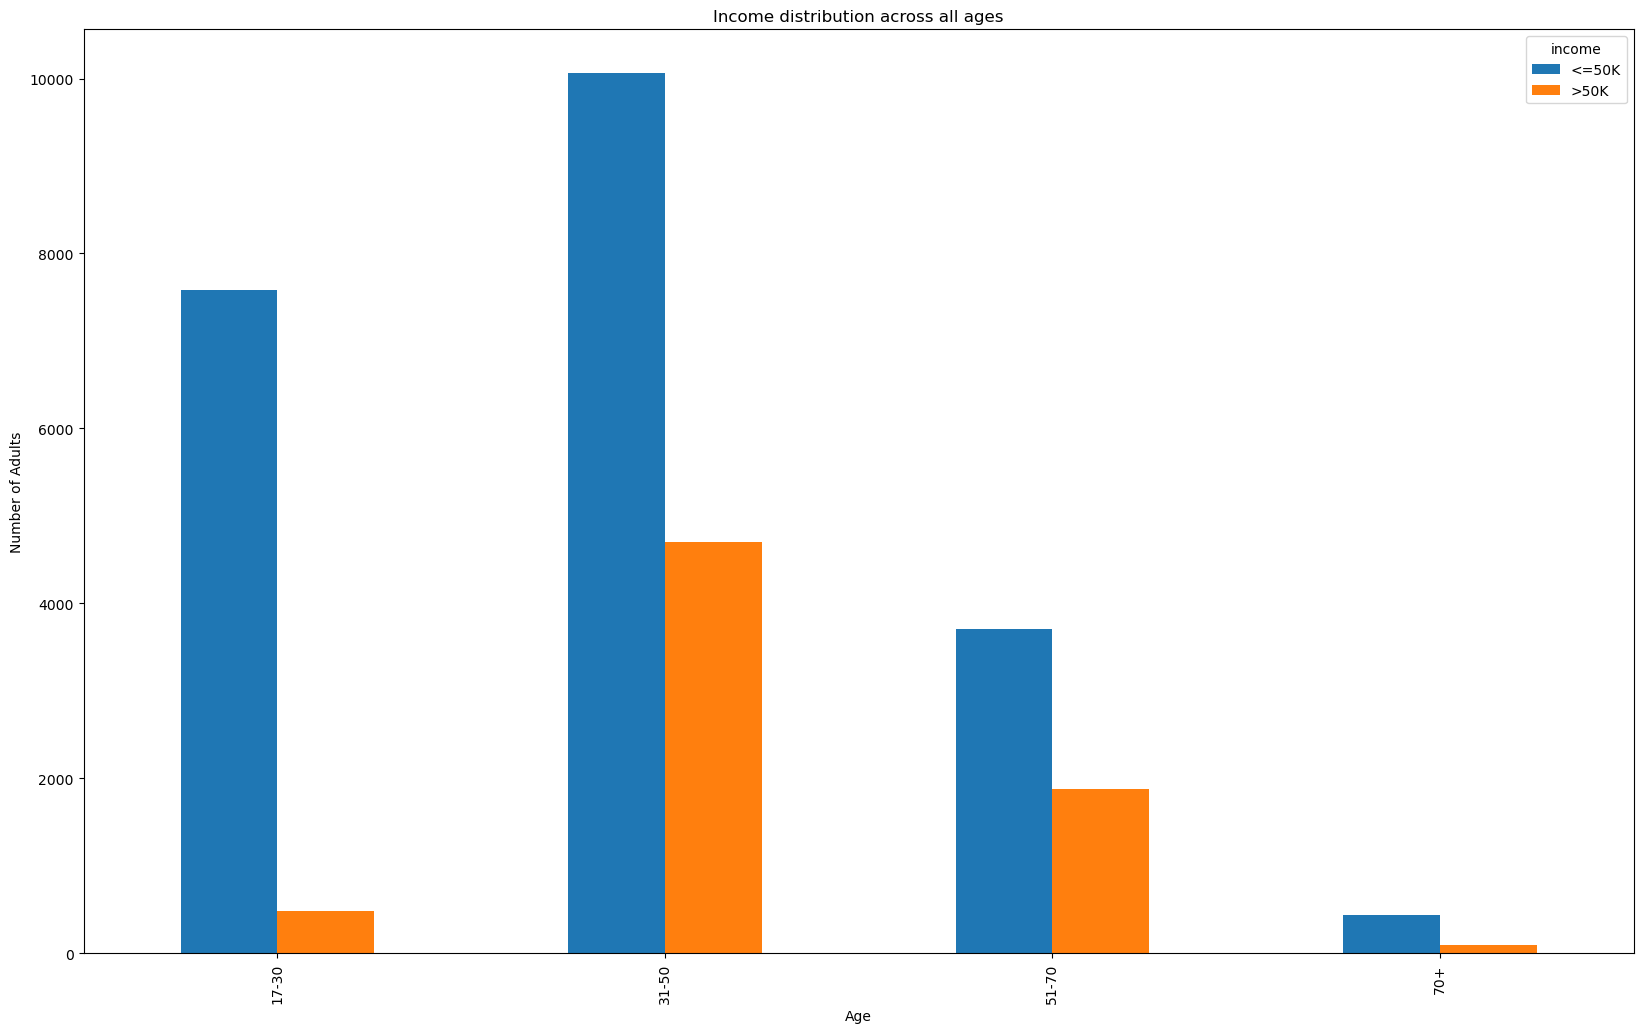

In [12]:
def age_group(x):
    x = int(x)
    if x <+ 30:
        return "17-30"
    elif x <= 50:
        return "31-50"
    elif x <= 70:
        return "51-70"
    else:
        return "70+"


df["age"] = df["age"].apply(age_group)
age = df.groupby(['age', 'income']).size().unstack(fill_value=0)
ax = age.plot(kind ='bar', title = 'Income distribution across all ages', figsize = (20,12))
ax.set_xlabel('Age')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/age.png')

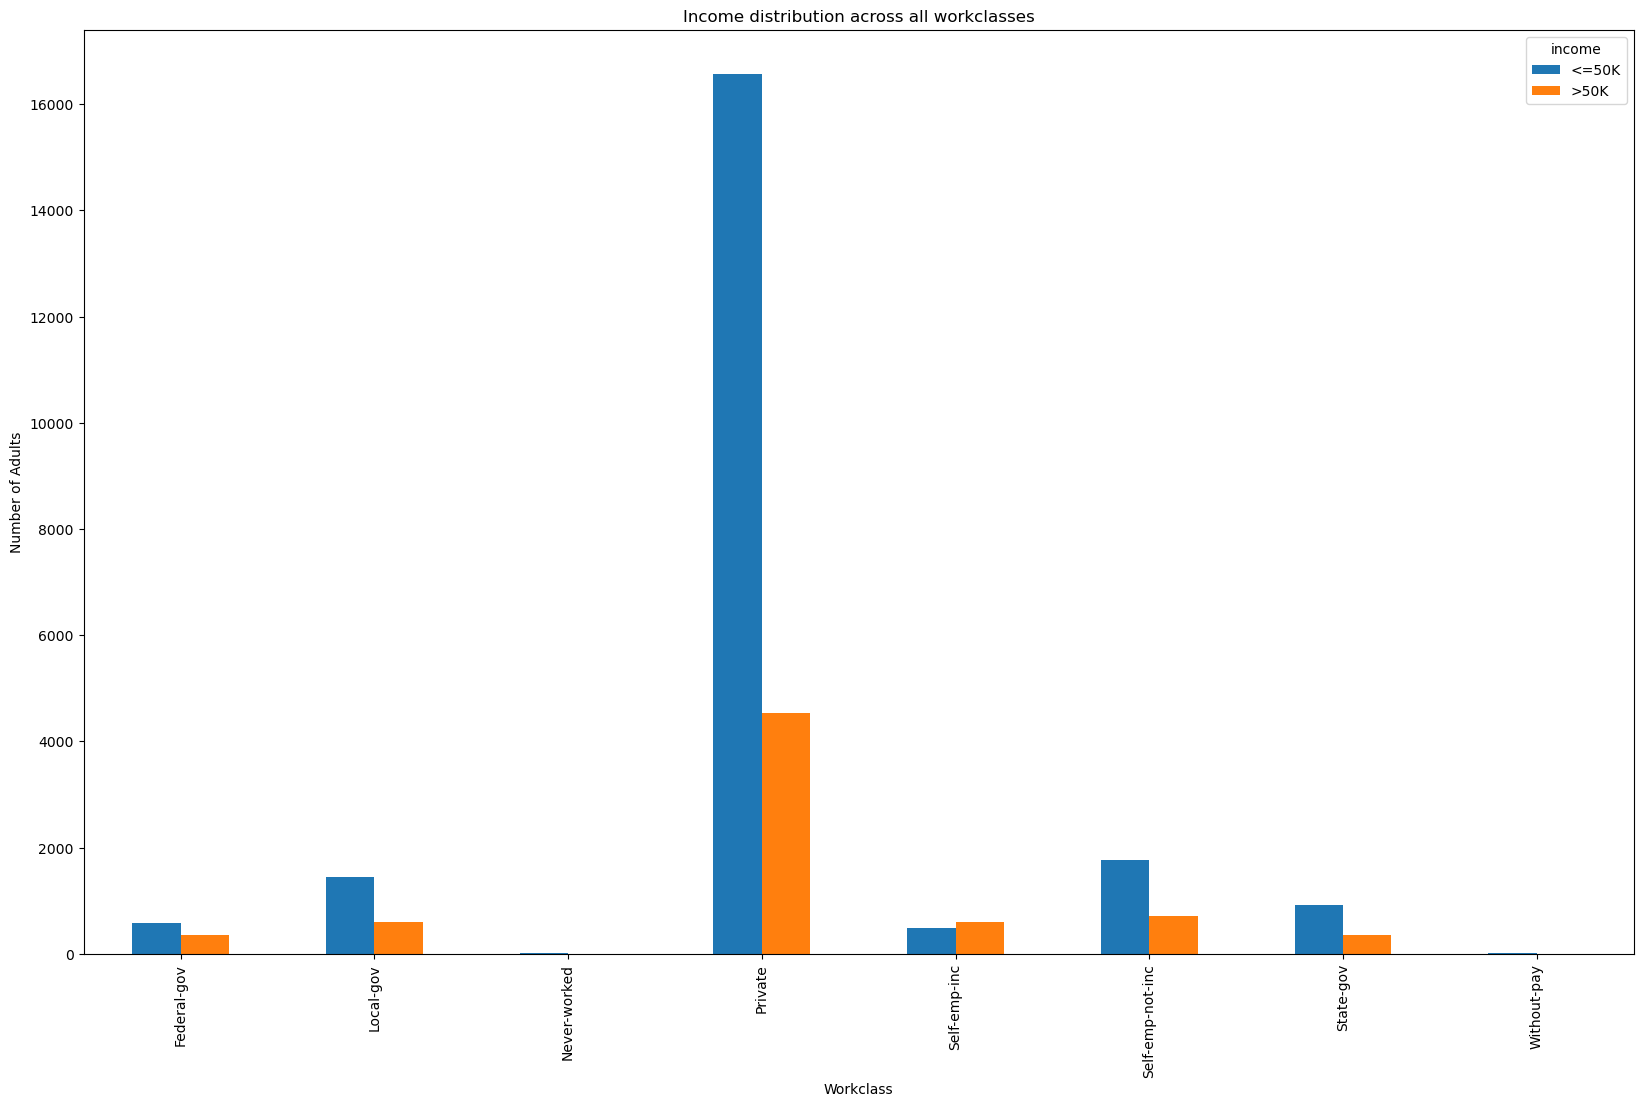

In [13]:
workclass = df.groupby(['workclass', 'income']).size().unstack()
ax = workclass.plot(kind ='bar', title = 'Income distribution across all workclasses', figsize = (20,12))
ax.set_xlabel('Workclass')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/workclass.png')

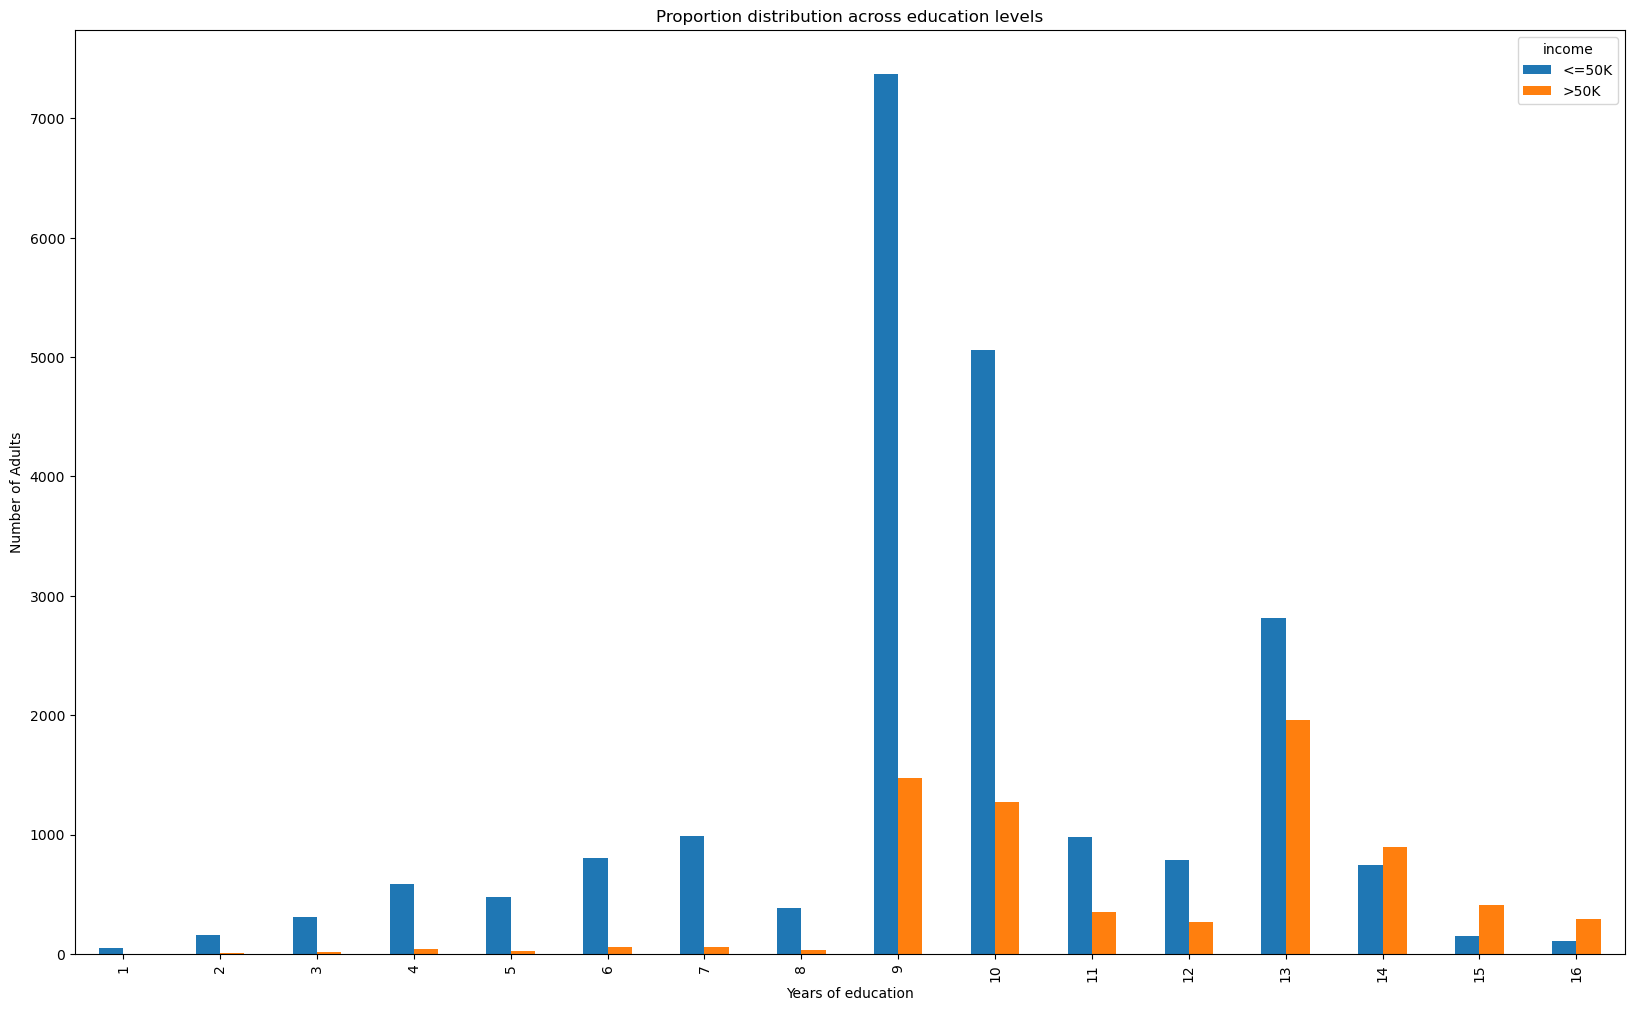

In [14]:
education_num = df.groupby(['education.num', 'income']).size().unstack()
ax = education_num.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (20,12))
ax.set_xlabel('Years of education')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/education_num.png')

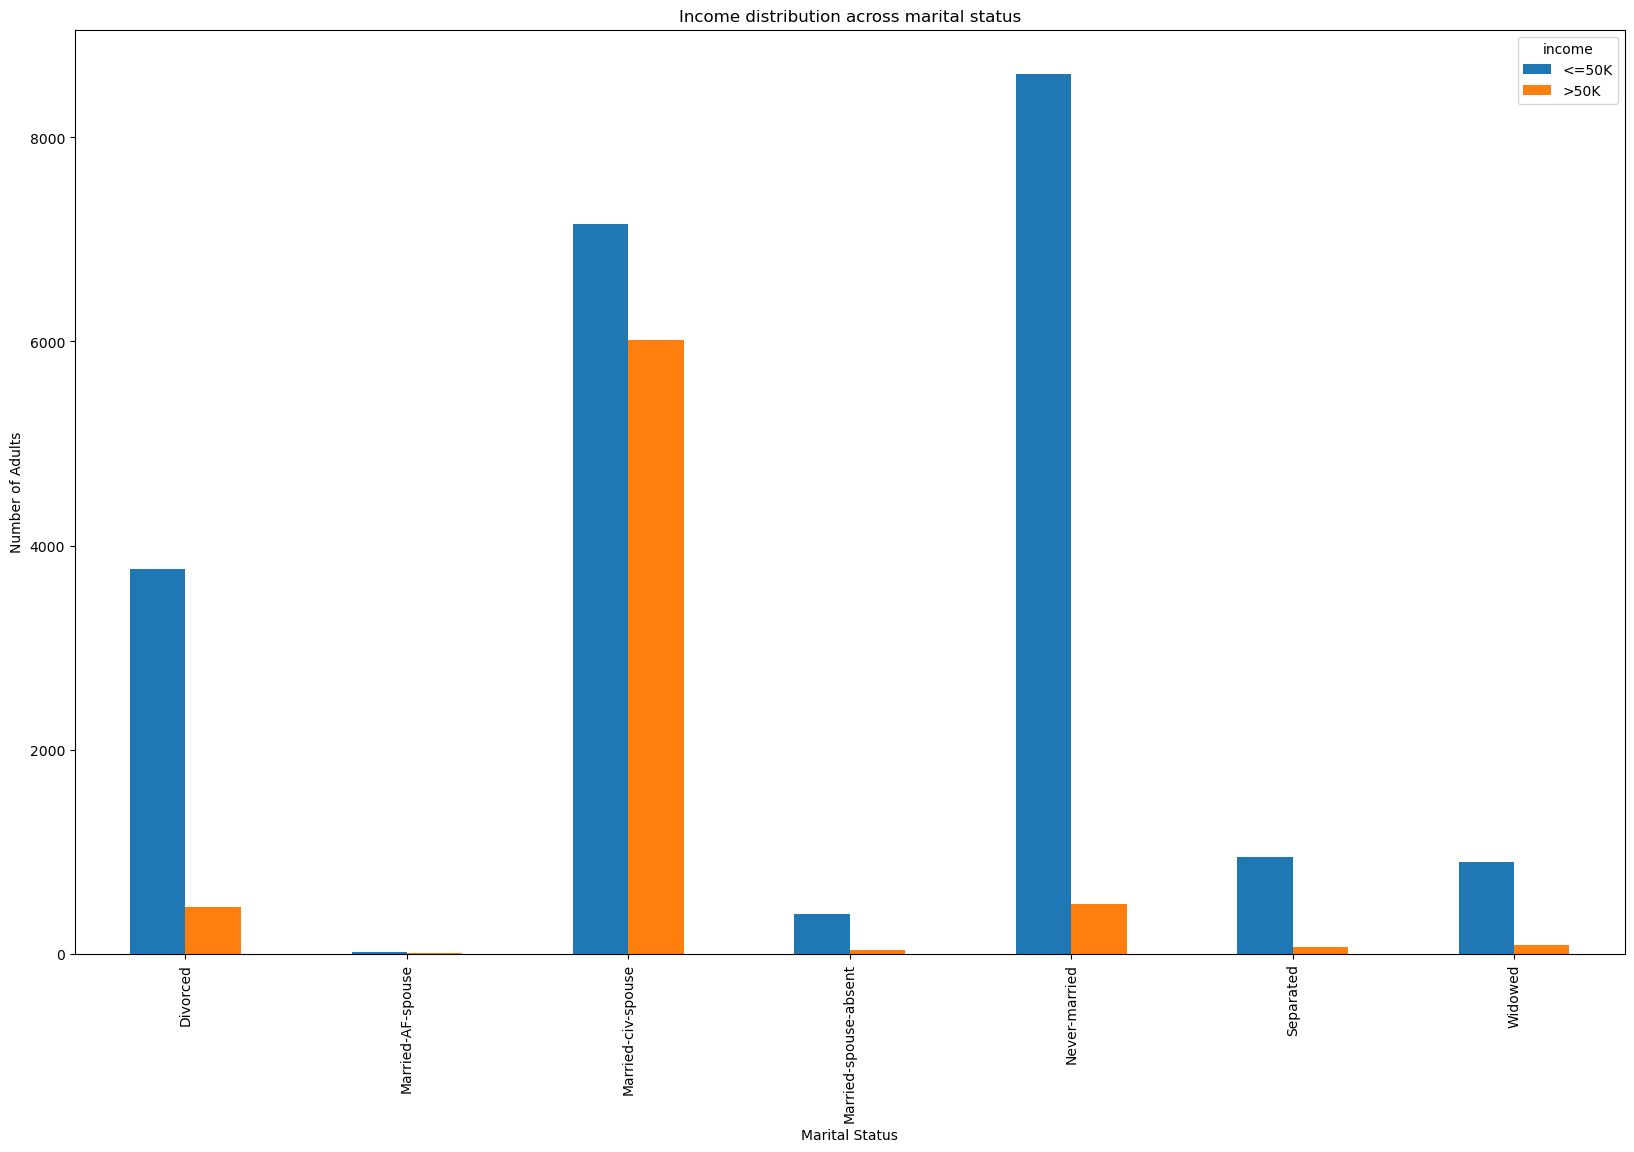

In [15]:
marital_status = df.groupby(['marital.status', 'income']).size().unstack()
ax = marital_status.plot(kind ='bar', title = 'Income distribution across marital status', figsize = (20,12))
ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/marital_status.png')

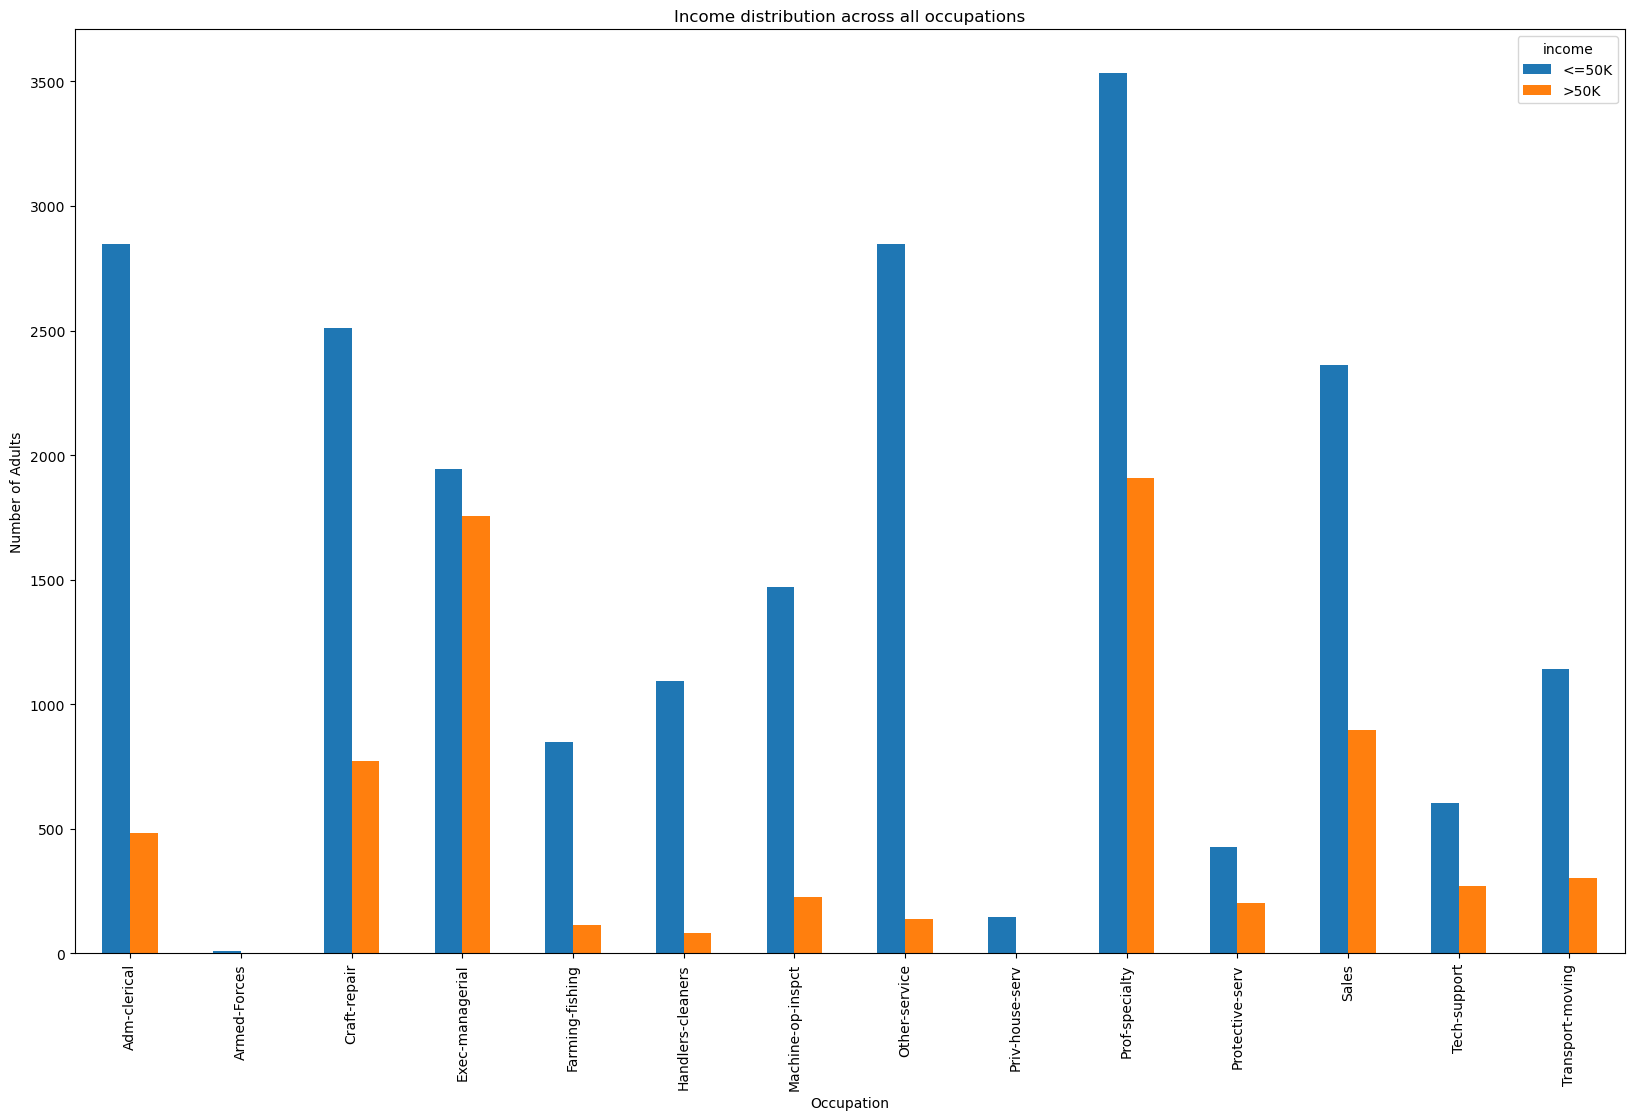

In [16]:
occupation = df.groupby(['occupation', 'income']).size().unstack()
ax = occupation.plot(kind ='bar', title = 'Income distribution across all occupations', figsize = (20,12))
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/occupation.png')

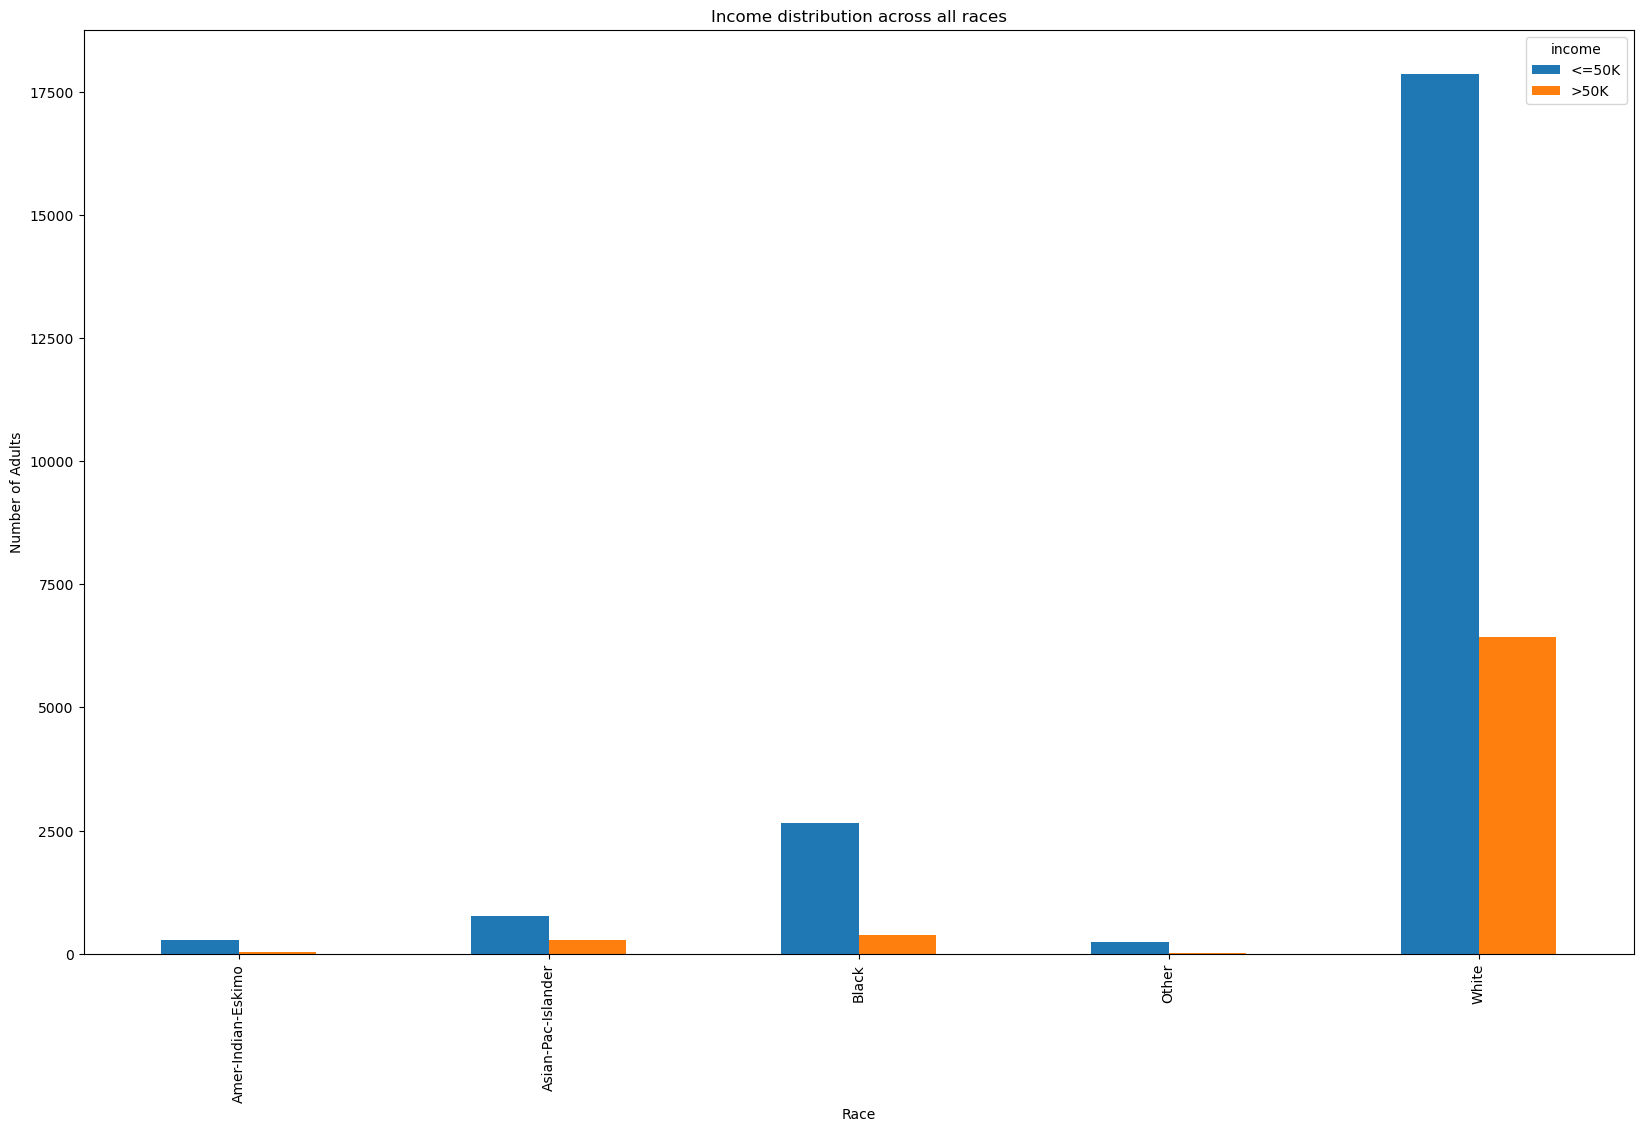

In [17]:
race = df.groupby(['race', 'income']).size().unstack()
ax = race.plot(kind ='bar', title = 'Income distribution across all races', figsize = (20,12))
ax.set_xlabel('Race')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/race.png')

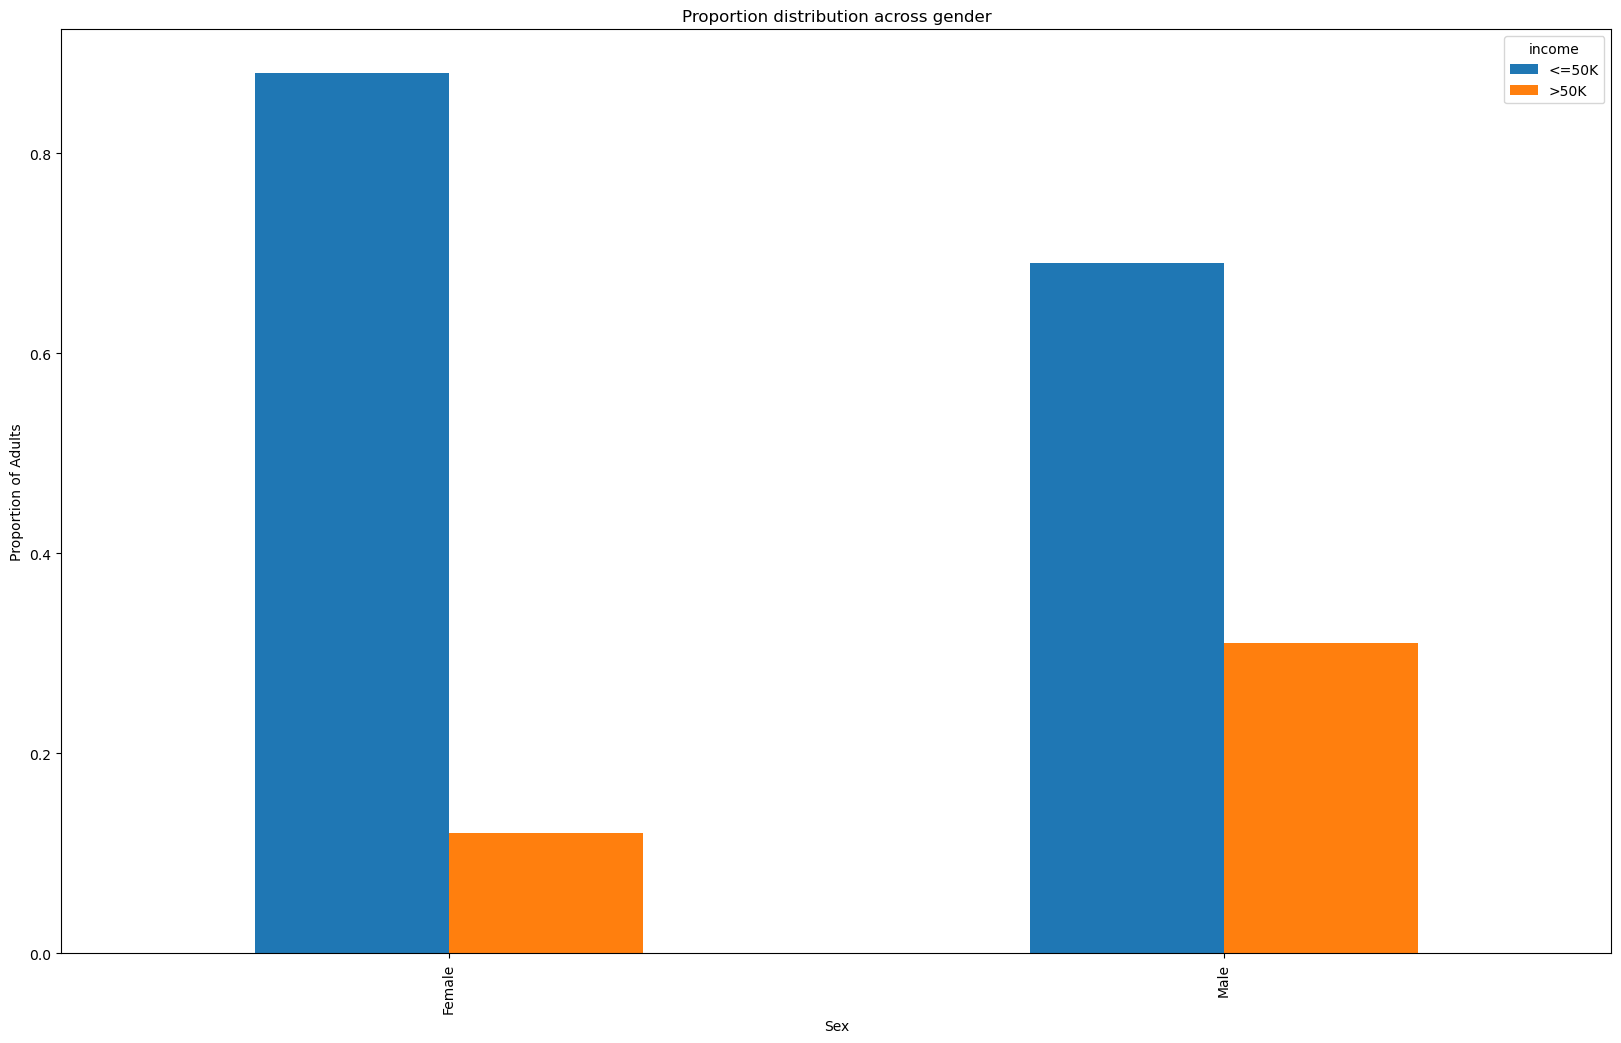

In [18]:
sex = round(pd.crosstab(df["sex"], df["income"]).div(pd.crosstab(df["sex"], df["income"]).apply(sum,1),0),2)
ax = sex.plot(kind ='bar', title = 'Proportion distribution across gender', figsize = (20,12))
ax.set_xlabel('Sex')
ax.set_ylabel('Proportion of Adults')
plt.savefig('graphs/sex.png')

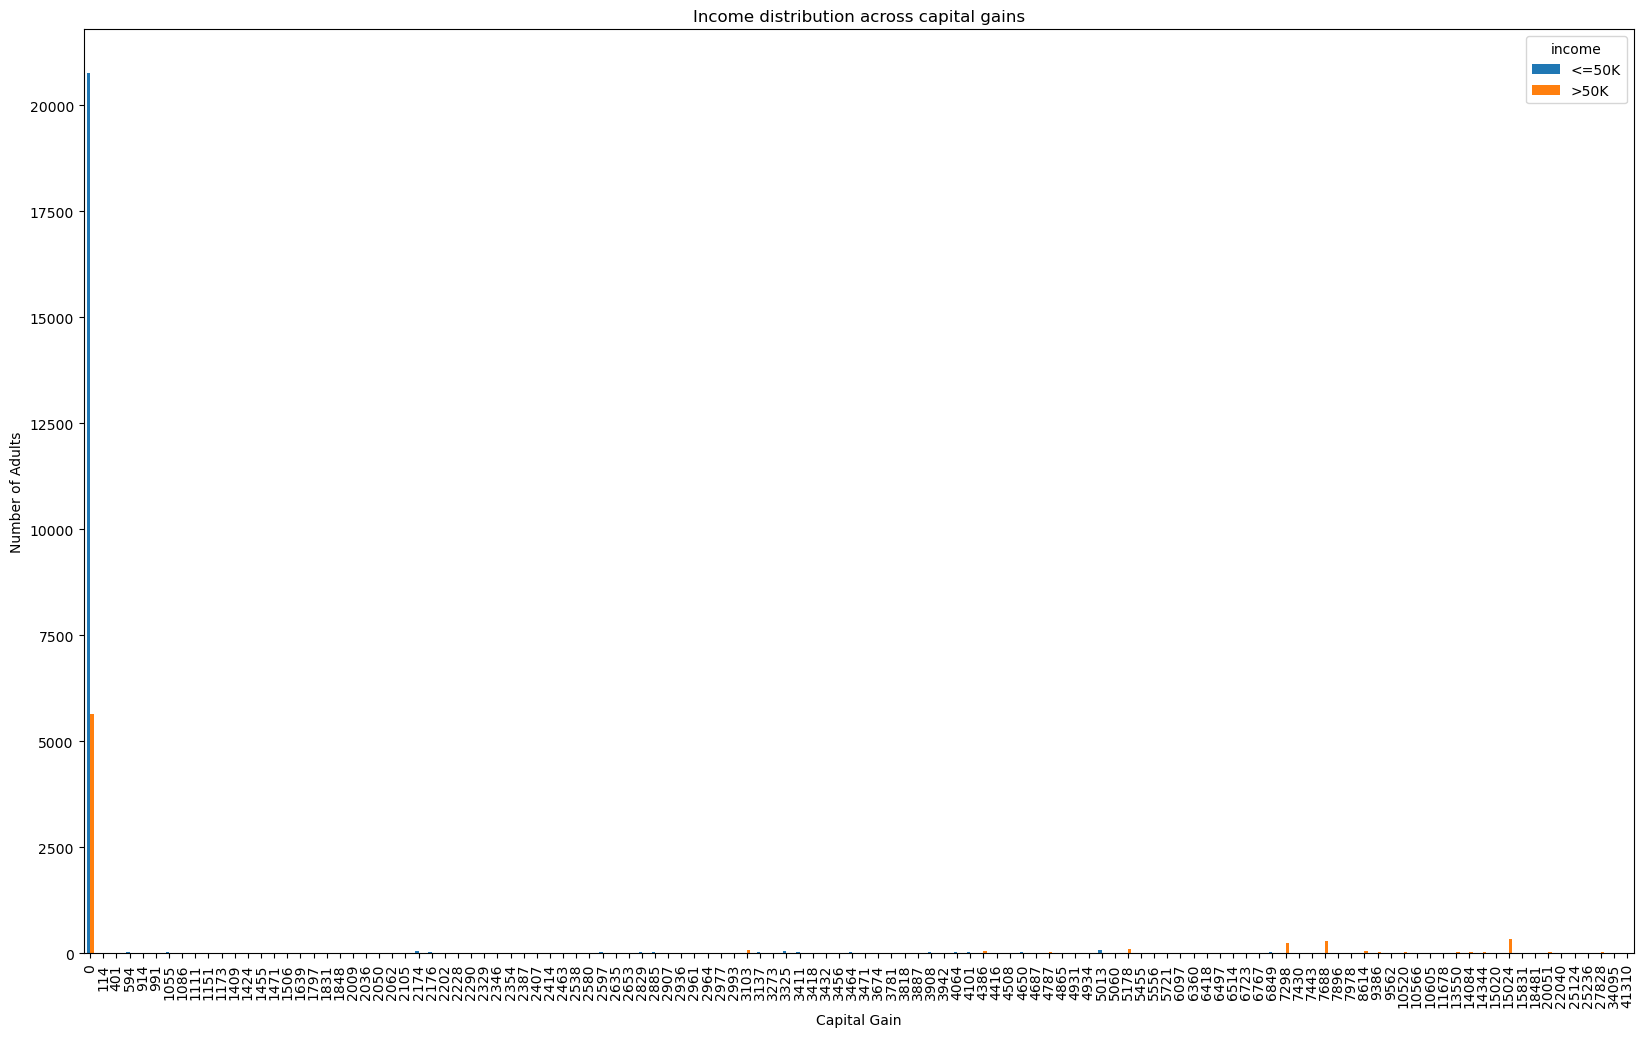

In [19]:
capital_gain = df.groupby(['capital.gain', 'income']).size().unstack(fill_value=0)
ax = capital_gain.plot(kind ='bar', title = 'Income distribution across capital gains', figsize = (20,12))
ax.set_xlabel('Capital Gain')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/capital_gain.png')

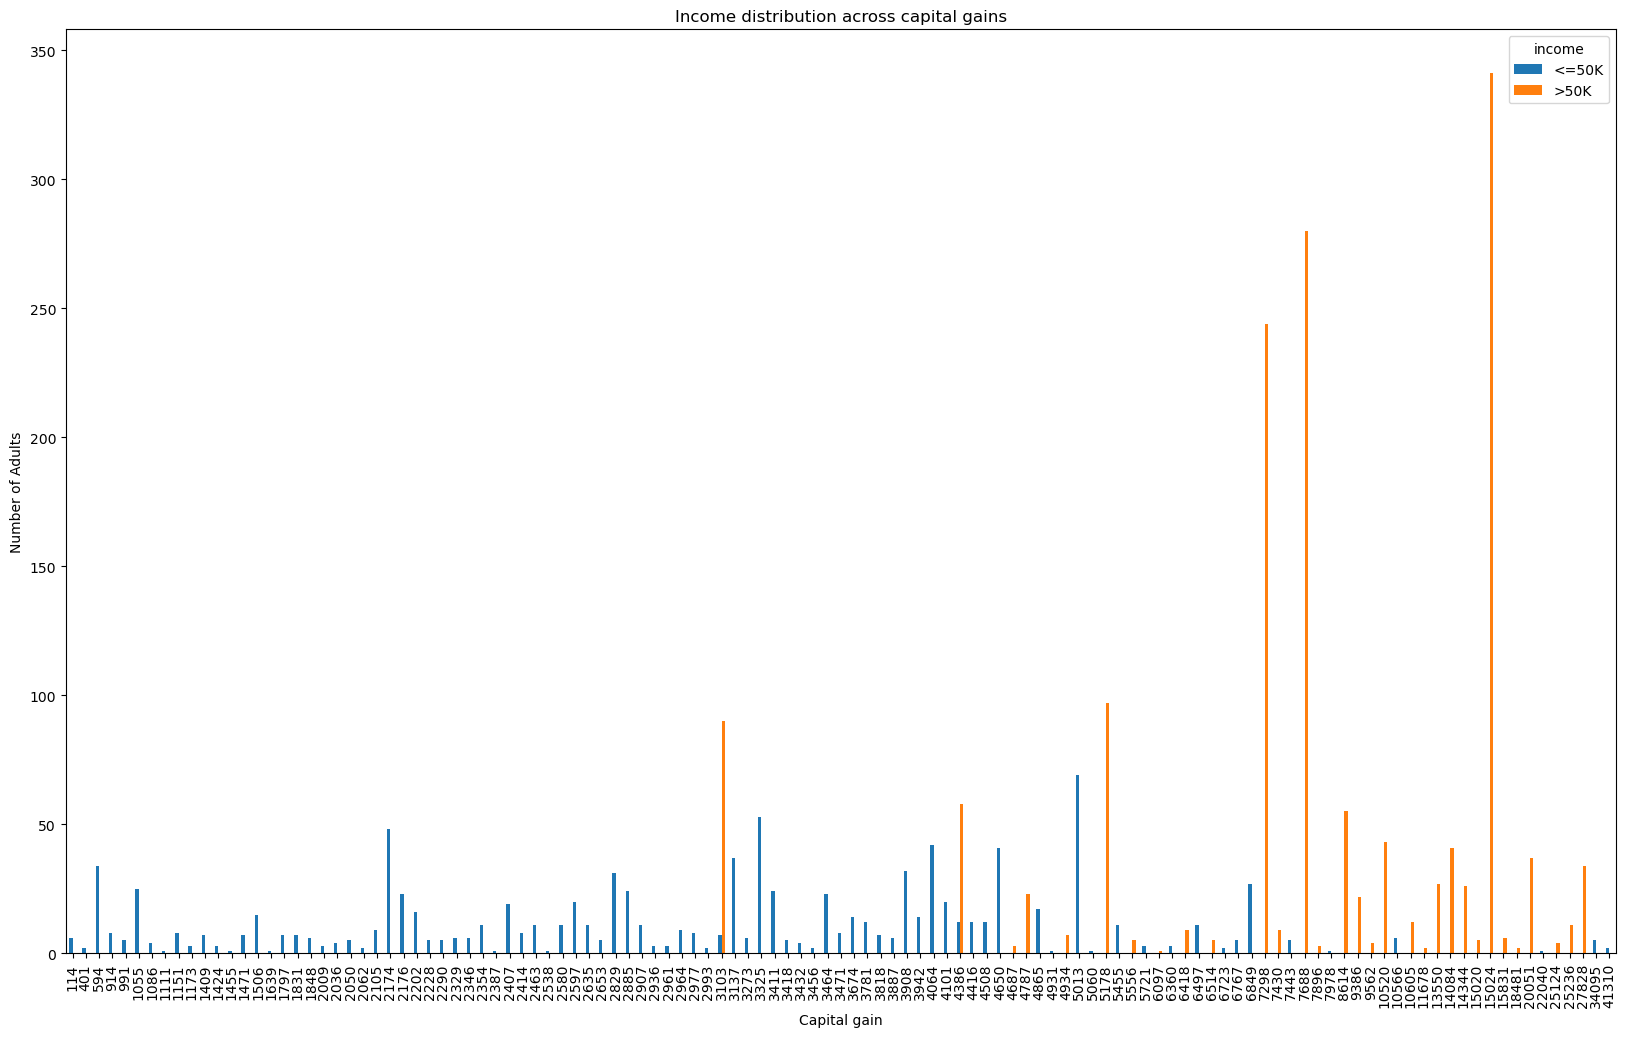

In [20]:
df["non_zero_capital_gain"] = df["capital.gain"].apply(lambda x: x if x > 0 else pd.NA)
capital_gain = df.groupby(['non_zero_capital_gain', 'income']).size().unstack()
ax = capital_gain.plot(kind ='bar', title = 'Income distribution across capital gains', figsize = (20,12))
ax.set_xlabel('Capital gain')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/non_zero_capital_gain.png')

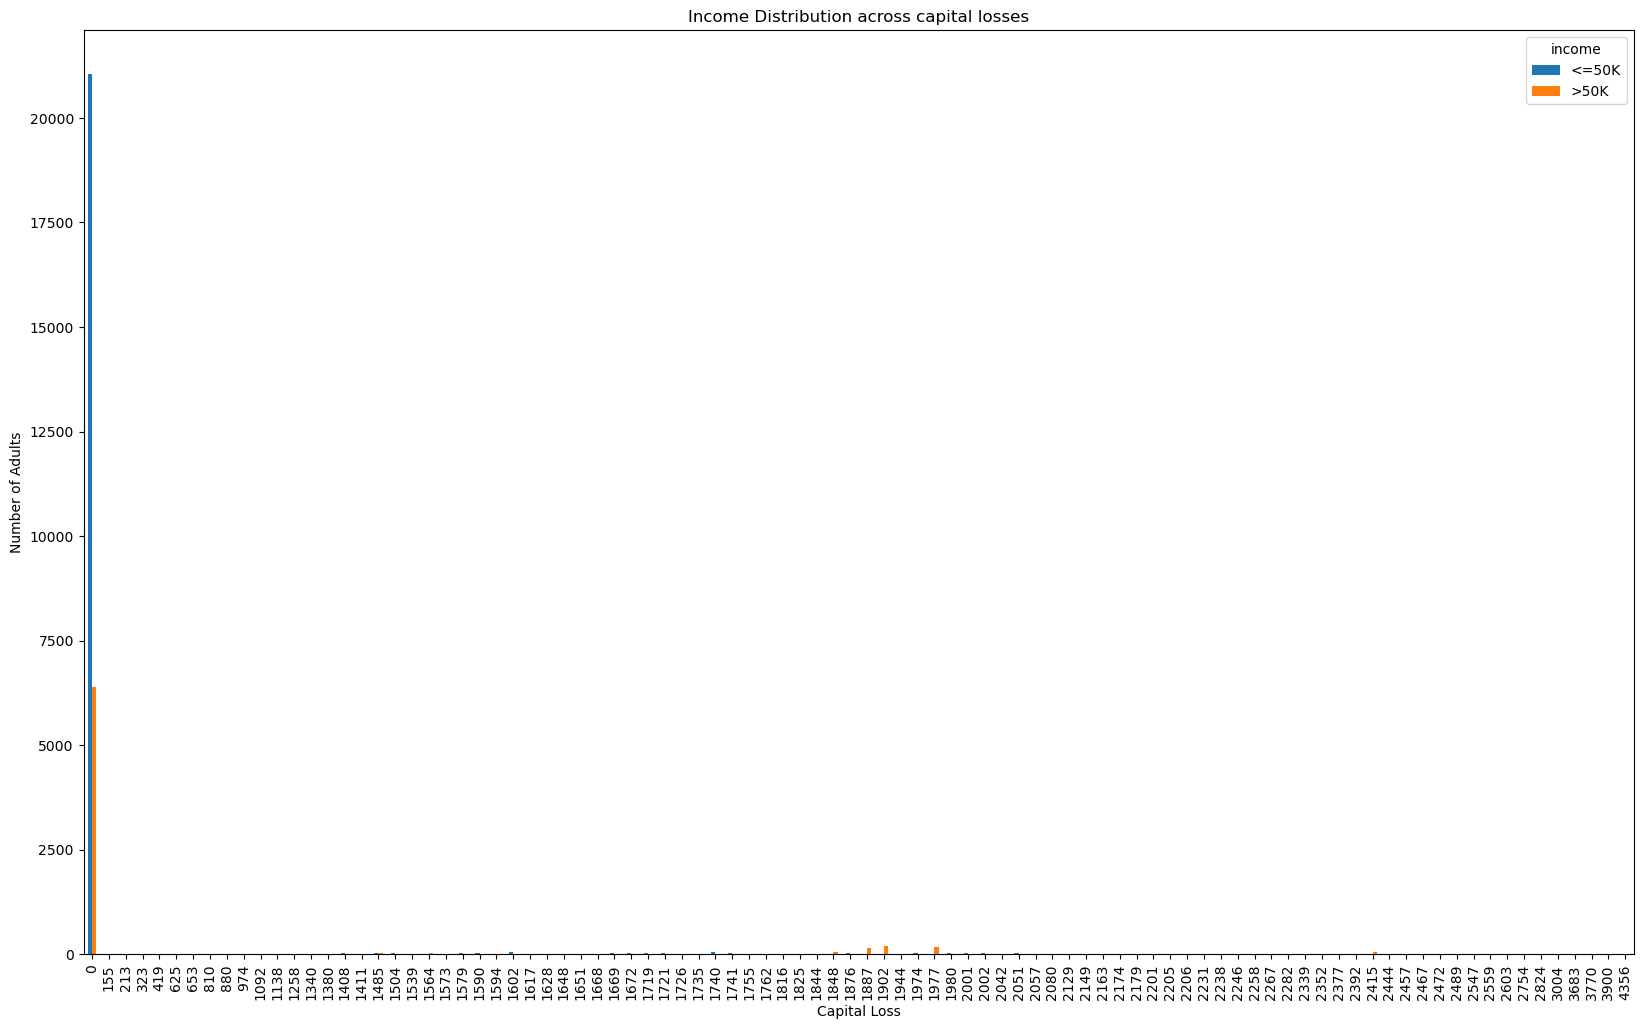

In [21]:
capital_loss = df.groupby(['capital.loss', 'income']).size().unstack()
ax = capital_loss.plot(kind ='bar', title = 'Income Distribution across capital losses', figsize = (20,12))
ax.set_xlabel('Capital Loss')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/capital_loss.png')

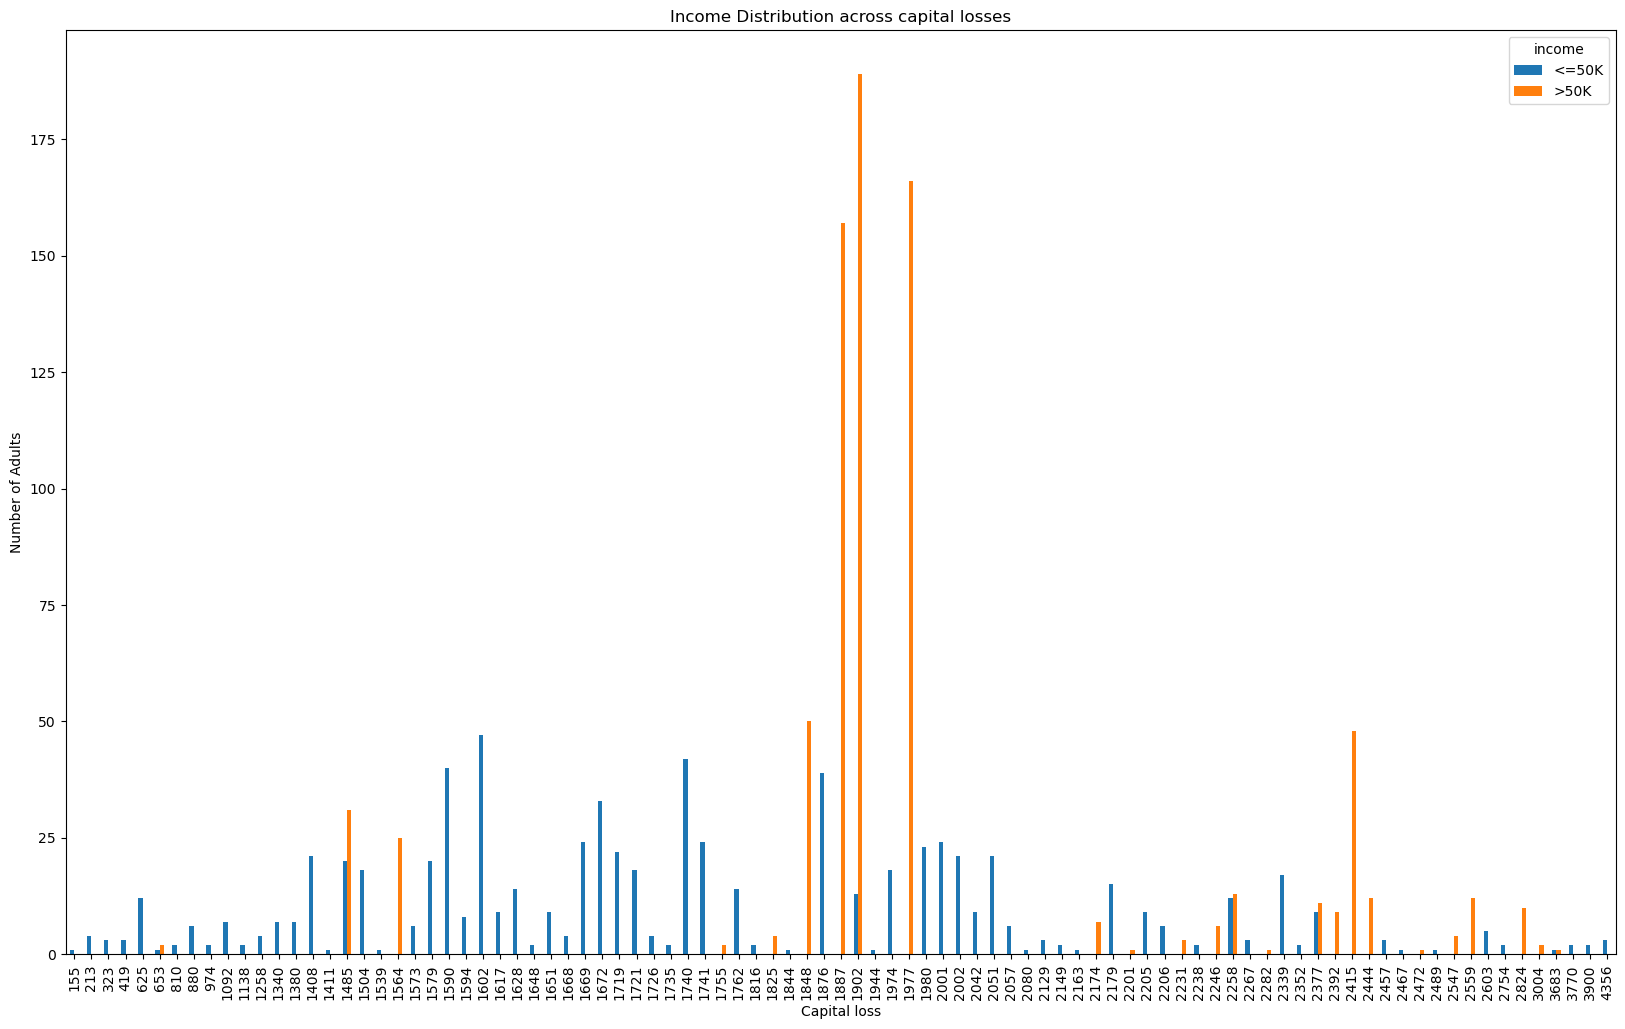

In [22]:
df["non_zero_capital_loss"] = df["capital.loss"].apply(lambda x: x if x > 0 else pd.NA)
capital_loss = df.groupby(['non_zero_capital_loss', 'income']).size().unstack()
ax = capital_loss.plot(kind ='bar', title = 'Income Distribution across capital losses', figsize = (20,12))
ax.set_xlabel('Capital loss')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/non_zero_capital_loss.png')

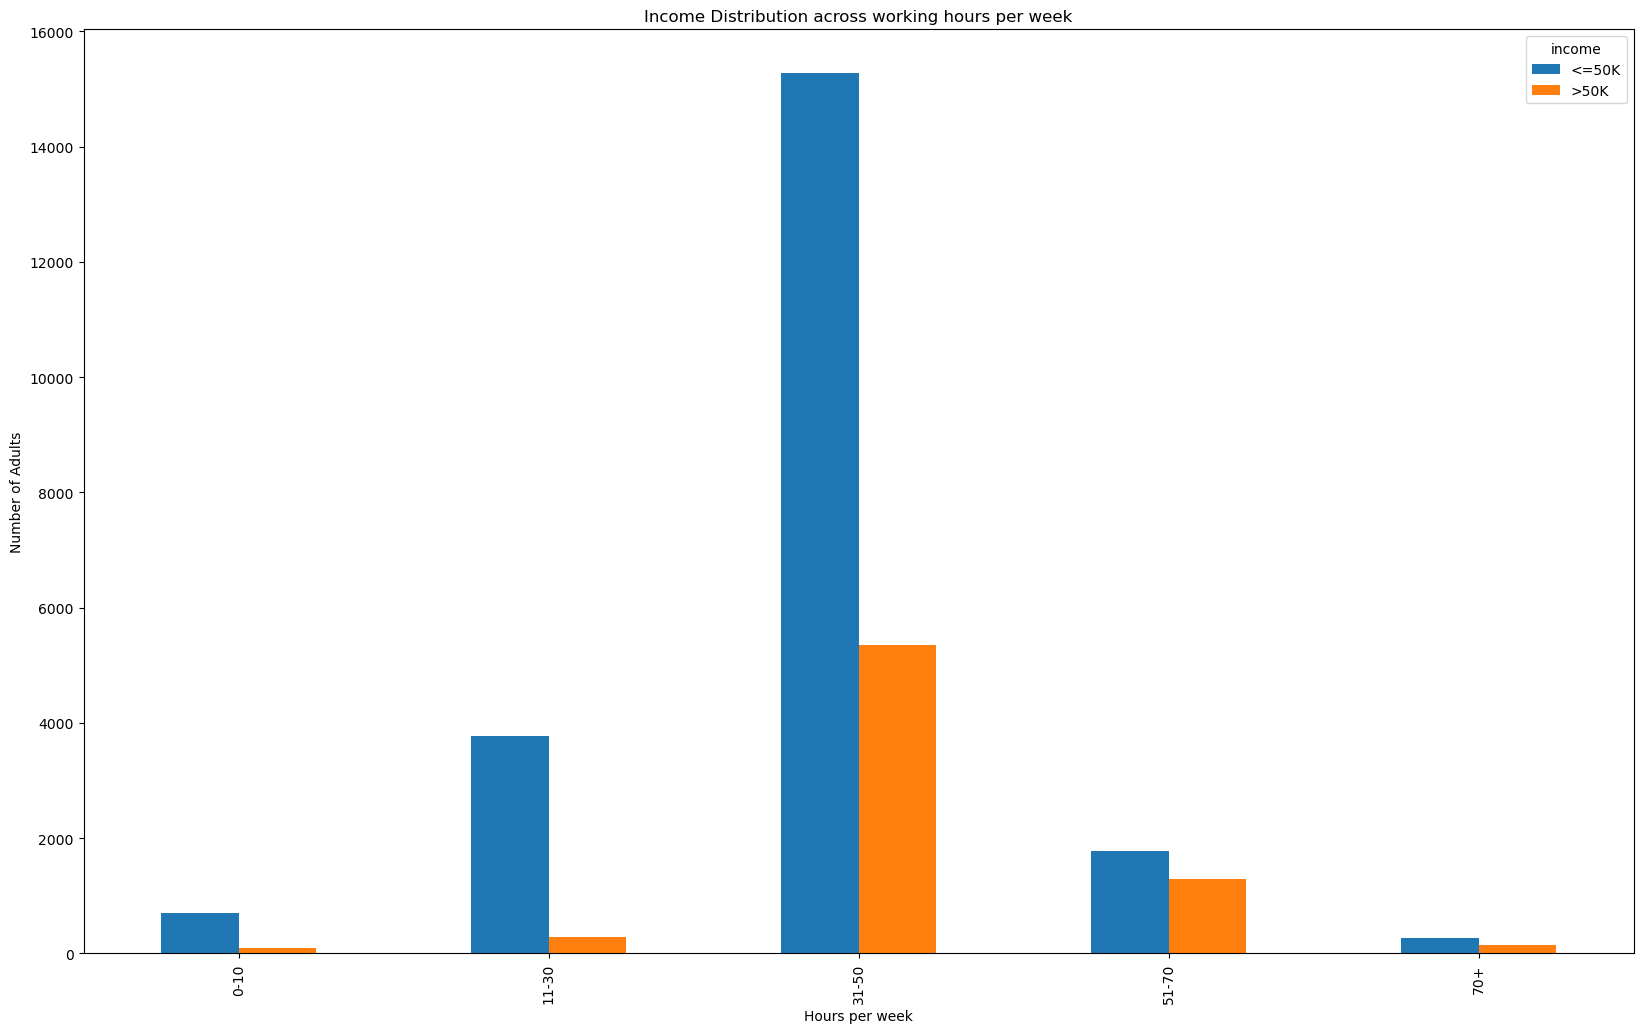

In [23]:
def hours_per_week(x):
    x = int(x)
    if x <= 10:
        return "0-10"
    elif x <= 30:
        return "11-30"
    elif x <= 50:
        return "31-50"
    elif x <= 70:
        return "51-70"
    else:
        return "70+"

df["hours.per.week"].replace(99, 0, inplace=True)
df["hours.per.week"] = df["hours.per.week"].apply(hours_per_week)
hours_per_week = df.groupby(['hours.per.week', 'income']).size().unstack()
ax = hours_per_week.plot(kind ='bar', title = 'Income Distribution across working hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/hours_per_week.png')

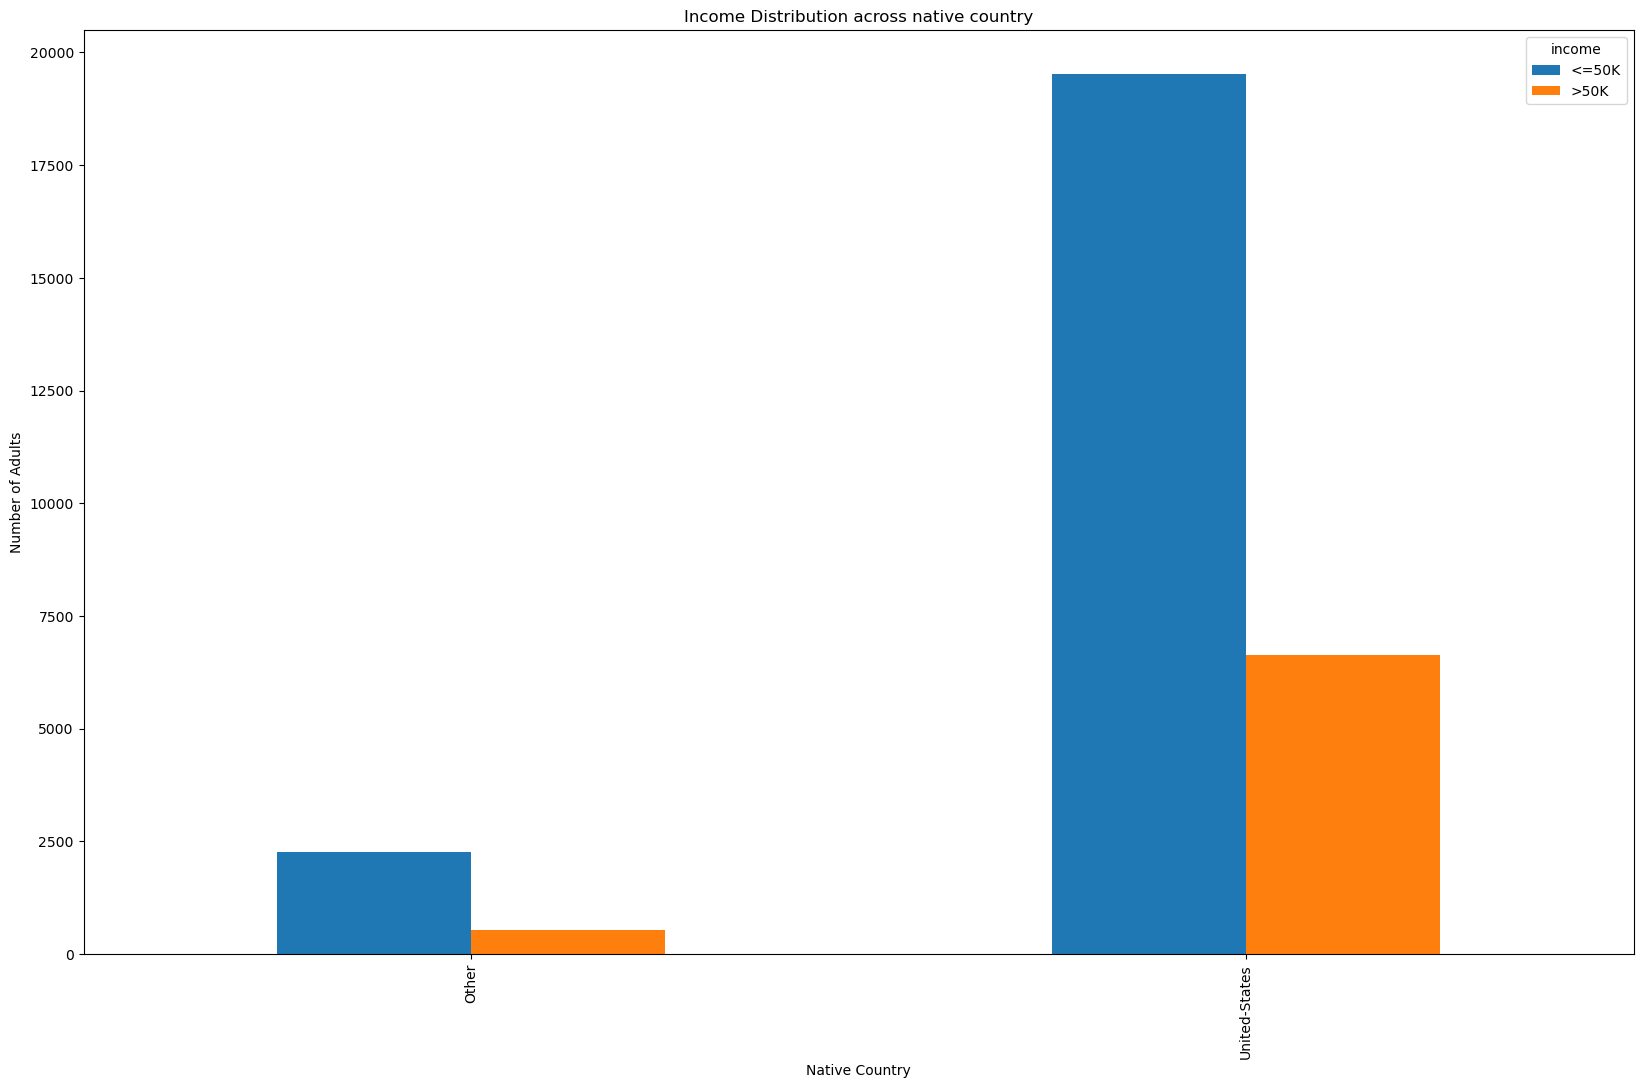

In [24]:
df["native.country"] = df["native.country"].apply(lambda x: "Other" if x != 'United-States' else "United-States")
native_country = df.groupby(['native.country', 'income']).size().unstack()
ax = native_country.plot(kind ='bar', title = 'Income Distribution across native country', figsize = (20,12))
ax.set_xlabel('Native Country')
ax.set_ylabel('Number of Adults')
plt.savefig('graphs/native_country.png')